Makaylah Cowan

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pca_cov import PCA_COV
from pca_svd import PCA_SVD

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [2]:
# Read in iris dataset as pandas dataframe
iris = pd.read_csv("Iris.csv")

# Create PCA_SVD object here
pca = PCA_SVD(iris)

In [6]:
# Test pca (no normalization) here
iris_headers = list(iris.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA.')
print(f'The original PCA data has shape {pca.A.shape}.')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}")
print(f'Your eigenvectors:\n{pca.e_vecs}.\n ')
print(f'Your eigenvalues:\n{pca.e_vals}.')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}.')

There are 4 vars in Iris PCA.
The original PCA data has shape (150, 4).
Eigenvector shape: (4, 4).
Eigenvalue shape: (4,).
Length of proportion variance account for: 4.
Length of cumulative proportion variance account for: 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]].
 
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384].
Cumulative proportion variance account for:
[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].


#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

In [3]:
data = pca.pca_project([0, 1])
p = plt.scatter(data[:,0],data[:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")



TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [4]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces.')
print(f'Shape of images is are {face_imgs.shape} faces.')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

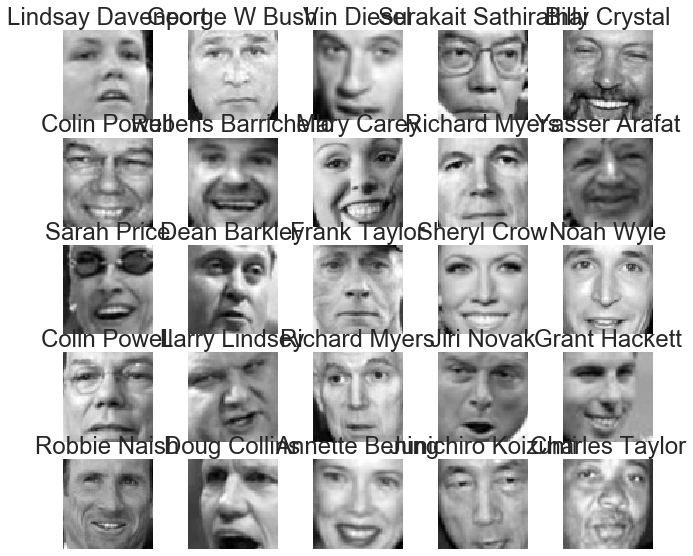

In [5]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axs = plt.subplots(5, 5)
    face = 0
    plt.subplots_adjust(left=-.5, bottom=-.5, right=.9, top=1.3, wspace=.2, hspace=.2)
    for i in range(5):
        for j in range(5):
            axs[i,j].axis('off')
            axs[i, j].imshow(face_imgs[face,:], cmap=plt.get_cmap('gray'))
            axs[i, j].set_title(face_names[face])
            face += 1
face_plot(face_imgs, face_names)


### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

Text(0.5, 1.0, 'Mean Face')

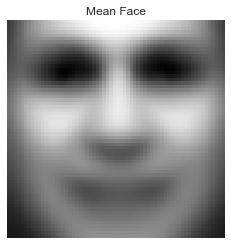

In [7]:
avg = plt.imshow(np.mean(face_imgs, axis = 0), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title("Mean Face")

**Question 6:** What does the "mean face" image represent?

**Question 6 answer:**
The mean face represents where you can find different colored pixels. In this way, it is what the "average" face from the dataset looks like.



### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [8]:
# Your reshape code here
face_imgs_vec = np.reshape(face_imgs, (face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2]) )
print(f'Your reshaped face images have shape={face_imgs_vec.shape}.')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [9]:
import time

# PCA object
pca_svd = PCA_SVD(face_imgs_vec)

# Time projection
start = time.time()
pca_svd.pca([i for i in range(4096)])
end = time.time()

print(end - start)

43.271682262420654


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

100 Principal Components:


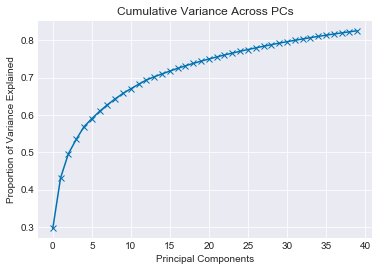

240 Principal Components:


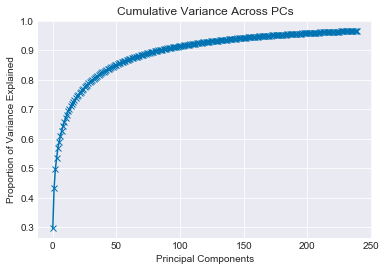

In [10]:
# Original Elbow plot
# pca_svd.elbow_plot()
# plt.show()

# Updated elbow plot
print("100 Principal Components:")
pca_svd.elbow_plot(40)
plt.show()

print("240 Principal Components:")
pca_svd.elbow_plot(240)
plt.show()


### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [11]:
import math
def make_imgs(reconstructed_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    # convert projected data back to image shape
    return np.reshape(reconstructed_imgs, (reconstructed_imgs.shape[0], int(math.sqrt(reconstructed_imgs.shape[1])),  int(math.sqrt(reconstructed_imgs.shape[1])) ))  


#### 50% variance face grid

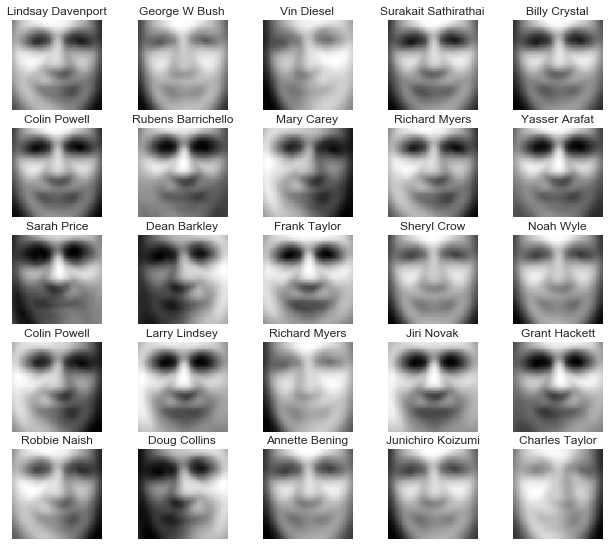

In [12]:
# Principal Components needed for 50% variance: 
fifty = pca_svd.pca_then_project_back(3)
imgs = make_imgs(fifty)
face_plot(imgs, face_names)



#### 70% variance face grid

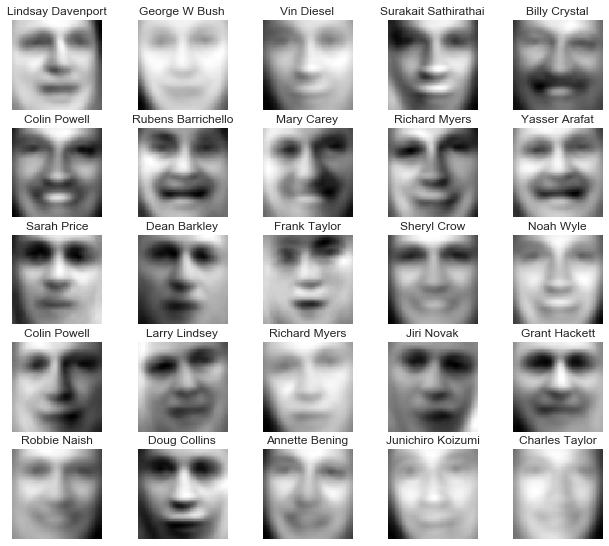

In [13]:
# Principal Components needed for 70% variance: 
seventy = pca_svd.pca_then_project_back(13)
img70 = make_imgs(seventy)
face_plot(img70, face_names)



#### 80% variance face grid

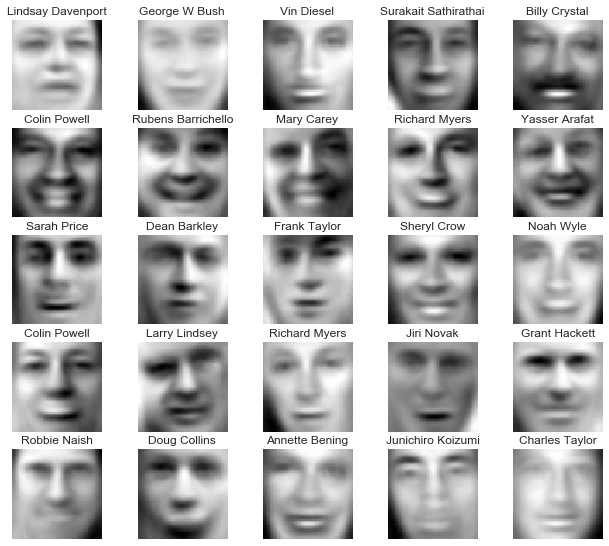

In [14]:
# Principal Components needed for 80% variance: 
eighty = pca_svd.pca_then_project_back(30)
img80 = make_imgs(eighty)
face_plot(img80, face_names)



#### 95% variance face grid

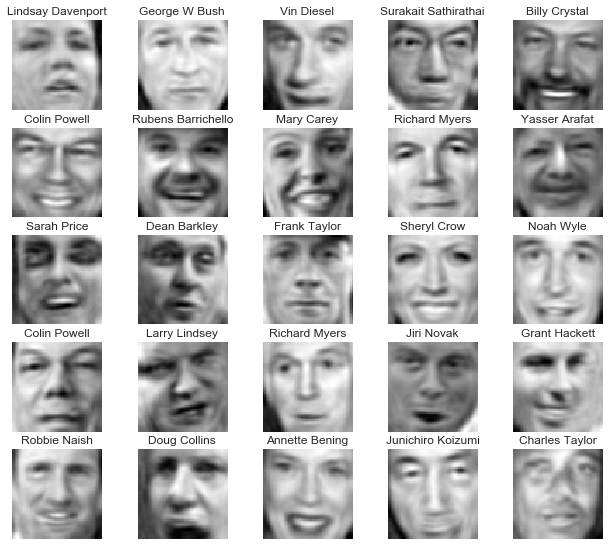

In [15]:
# Principal Components needed for 95% variance: 
nine= pca_svd.pca_then_project_back(180)
img95 = make_imgs(nine)
face_plot(img95, face_names)




**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer:**
The above reconstructions show the face data after keeping 50, 70, 80, and 95 percent of the variance. You can see how well the faces are reconstructed at each level. At first it begins blurry with only 50% of the original facial variation put back into the images, and it sort of looks like the mean face. at 80% and even moreso at 95% we see more individualized faces that can be recognized as the celebrities they belong to.





## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [16]:
import time

# PCA object
pca_cov = PCA_COV(face_imgs_vec)

# Time projection
start = time.time()
pca_cov.pca([i for i in range(4096)])
end = time.time()

print(end - start)

54.32813334465027


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:**

Covariance Method: 54.328 Seconds

SVD Method: 44.630 Seconds




### 5b) Stability comparison

In the cell below compute the difference between:
- eigenvalues
- eigenvectors

obtained from the two approaches. Sum up the **absolute differences** and print out the resulting float value.

In [17]:
value_dif = pca_cov.e_vals - pca_svd.e_vals
vector_dif = pca_cov.e_vecs - pca_svd.e_vecs

absvalue = np.sum(np.abs(value_dif))
absvector = np.sum(np.abs(vector_dif))

print("Absolute difference between eigenvalues", absvalue)
print("Absolute difference between eigenvectors", absvector)

Absolute difference between eigenvalues 979.6126576399322
Absolute difference between eigenvectors 273829.8383127407


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:** If we consider SVD as producing the "correct" result, then the discrepencies above suggest that the COV method does not do as good of a job at capturing the variation in the dataset (the cov method, on average, has smaller eigen vectors which is not ideal because it means less variance is represented).
